<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_03_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Quick Sort](https://www.youtube.com/watch?v=3San3uKKHgg)**

Sua estratégia consiste em selecionar um elemento da lista, conhecido como pivô. Em seguida, reorganiza a lista ao redor desse pivô, um processo chamado particionamento. O objetivo é posicionar todos os elementos menores que o pivô à sua esquerda e todos os elementos maiores à sua direita. Uma vez concluído o particionamento, o pivô já ocupa sua posição final correta na lista ordenada. O Quicksort então aplica recursivamente o mesmo procedimento às sub-listas formadas à esquerda e à direita do pivô, até que toda a lista esteja ordenada. Considere uma lista de exemplo com 9 elementos, onde o primeiro elemento é 54. Neste caso, o 54 funcionaria como o pivô inicial.



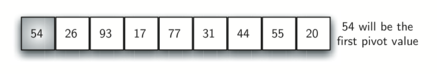

Para iniciar o particionamento, definimos dois marcadores: um *leftmark* (marca esquerda) e um *rightmark* (marca direita). O *leftmark* começa no início da porção da lista a ser analisada (logo após o pivô, se ele for o primeiro elemento), e o *rightmark* começa no final dessa porção. O objetivo é reposicionar os itens que estão do lado "incorreto" da lista em relação ao valor do pivô. Isso é feito movendo os marcadores um em direção ao outro, identificando e trocando elementos que estão fora de lugar, até que os marcadores se cruzem. Esse avanço convergente em direção ao ponto de divisão é o que organiza a seção da lista, como ilustrado na figura a seguir.

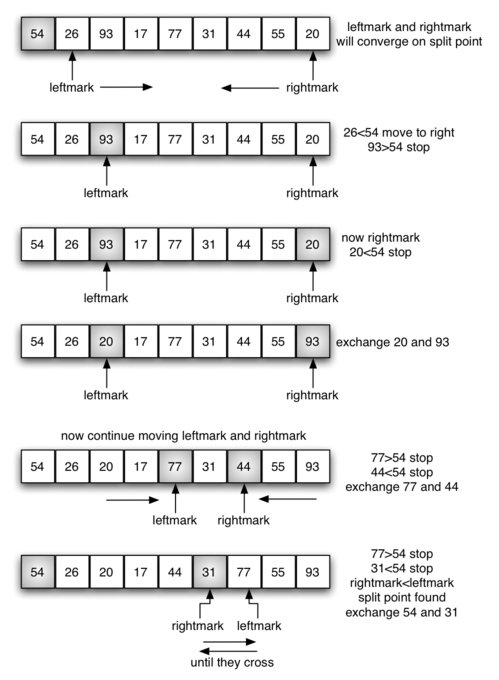

O algoritmo opera da seguinte maneira: *leftmark* é incrementado até apontar para um valor maior ou igual ao valor do pivô. Então, *rightmark* é decrementado até encontrar um valor menor ou igual ao do pivô. Se, após esses movimentos, `leftmark < rightmark`, isso indica que encontramos dois elementos que estão "do lado errado" em relação à futura posição do pivô. No exemplo, isso ocorre quando *leftmark* aponta para 93 e *rightmark* para 20. Neste ponto, realizamos a troca desses dois valores (93 e 20) e o processo de busca (mover *leftmark* e *rightmark*) recomeça. Este ciclo continua até que o *rightmark* cruze ou se iguale ao *leftmark* (`rightmark <= leftmark`). Esse cruzamento sinaliza que o ponto de divisão foi encontrado. Neste momento, trocamos o valor original do pivô (que estava no início da seção) com o valor na posição *rightmark*. Essa troca posiciona o pivô em seu lugar definitivo na lista ordenada. Com o pivô em sua posição final, a lista está efetivamente dividida. Agora, o algoritmo Quicksort é invocado recursivamente sobre as duas sub-listas resultantes: a sub-lista à esquerda do pivô e a sub-lista à sua direita. Esse processo recursivo continua até que todas as sub-listas contenham apenas um elemento ou estejam vazias, ponto em que a lista inteira estará ordenada, conforme ilustra a figura abaixo.


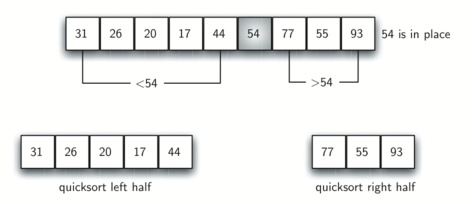

## **Implementação**

### **Função particionar**

A função particionar é usada para reorganizar uma lista em torno de um pivô. Ela posiciona os menores valores à esquerda e os maiores à direita, trocando elementos conforme necessário. No final, o pivô é colocado em sua posição correta, e a função retorna seu índice.



In [1]:
def particionar(lista, inicio, fim):
    pivo = lista[inicio]
    esquerda = inicio + 1
    direita = fim

    while True:
        # Avança enquanto os valores forem menores ou iguais ao pivô
        while esquerda <= direita and lista[esquerda] <= pivo:
            esquerda += 1

        # Retrocede enquanto os valores forem maiores ou iguais ao pivô
        while direita >= esquerda and lista[direita] >= pivo:
            direita -= 1

        # Se os ponteiros se cruzaram, encerra o laço
        if esquerda > direita:
            break

        # Troca os elementos fora de ordem
        lista[esquerda], lista[direita] = lista[direita], lista[esquerda]

    # Coloca o pivô em sua posição correta
    lista[inicio], lista[direita] = lista[direita], lista[inicio]
    return direita  # Retorna o índice final do pivô

**Explicação**

1. **Definição do Pivô**  
   - O primeiro elemento da lista (`lista[inicio]`) é escolhido como pivô.  
   - Dois ponteiros são definidos:  
     - `esquerda`, iniciando logo após o pivô.  
     - `direita`, iniciando no final da lista.  

2. **Movimentação dos Ponteiros**  
   - O ponteiro `esquerda` avança enquanto encontrar elementos **menores ou iguais** ao pivô.  
   - O ponteiro `direita` recua enquanto encontrar elementos **maiores ou iguais** ao pivô.  

3. **Troca de Elementos Fora de Ordem**  
   - Se `esquerda < direita`,  há um elemento maior que o pivô na esquerda e um menor na direita, então eles são trocados.  
   - Se `esquerda >= direita`, os ponteiros se cruzaram e o loop termina.  

4. **Posicionamento Final do Pivô**  
   - O pivô é trocado com o elemento em `direita`, garantindo que todos os menores estejam à esquerda e os maiores à direita.  

5. **Retorno do Índice do Pivô**  
   - A função retorna `direita`, que é a posição correta do pivô na lista.

### **Função quicksort**

A função aplica a estratégia recursiva do algoritmo. Ela ordena uma lista (ou sublista delimitada por `inicio` e `fim`) dividindo-a em duas partes menores usando a função `particionar`. Em seguida, chama a si mesma recursivamente para ordenar essas duas sub-listas (à esquerda e à direita do pivô), repetindo o processo até que toda a lista esteja ordenada.

In [2]:
def quicksort(lista, inicio=0, fim=None):
    if fim is None:
        fim = len(lista) - 1 # Define 'fim' como o último índice da lista, se não for fornecido

    if inicio < fim:  # Garante que há pelo menos dois elementos para ordenar
        indice_pivo = particionar(lista, inicio, fim)   # Particiona e obtém o índice final do pivô
        quicksort(lista, inicio, indice_pivo - 1)  # Ordena a sub-lista à esquerda do pivô
        quicksort(lista, indice_pivo + 1, fim)  # Ordena a sub-lista à direita do pivô

**Explicação**  

**1. Definição dos Limites da Lista**  
- A função `quick_sort` recebe a lista e os índices `inicio` e `fim`, que definem a parte da lista a ser ordenada.  
- Se `fim` não for especificado, ele é definido como o último índice da lista (`len(lista) - 1`).  

**2. Verificação da Condição de Parada**  
- Se `inicio < fim`, significa que ainda há mais de um elemento para ordenar, então o algoritmo continua.  
- Caso contrário, a função retorna sem fazer nada.  

**3. Particionamento da Lista**  
- A função `particionar(lista, inicio, fim)` é chamada para reorganizar os elementos.  
- O **pivô** é escolhido e colocado na posição correta, garantindo que:  
  - Elementos **menores** que o pivô fiquem à esquerda.  
  - Elementos **maiores** que o pivô fiquem à direita.  
- O índice final do pivô é armazenado na variável `indice_pivo`.  

**4. Chamada Recursiva para as Sub-listas**  
- **Ordenação da parte esquerda**:  
  - `quick_sort(lista, inicio, indice_pivo - 1)`: Ordena os elementos antes do pivô.  
- **Ordenação da parte direita**:  
  - `quick_sort(lista, indice_pivo + 1, fim)`: Ordena os elementos após o pivô.  

**5. Repetição do Processo**  
- A função `quick_sort` é chamada recursivamente até que todas as sub-listas tenham **zero ou um elemento**.  
- Quando isso acontece, a lista estará completamente ordenada.

### **Exemplo de Uso**

In [3]:
numeros = [64, 34, 25, 12, 22, 11, 90]
quicksort(numeros)
print(numeros)

[11, 12, 22, 25, 34, 64, 90]


## **Análise de Complexidade**

É um algoritmo de ordenação baseado na estratégia "dividir para conquistar". Ele seleciona um elemento como pivô, particiona os outros elementos em duas sublistas (menores que o pivô e maiores que o pivô), e recursivamente ordena essas sublistas.

### **Complexidade de Tempo**

#### **Melhor Caso / Caso Médio**

Acontece quando a estratégia de escolha do pivô seleciona consistentemente o elemento mediano da sublista atual em cada chamada recursiva. Essa escolha ideal garante que a etapa de particionamento divida a sublista em duas partes o mais equilibradas possível. Essa divisão balanceada minimiza a profundidade da recursão. A tabela abaixo ilustra como o trabalho computacional se distribui pelos níveis da árvore de recursão, usando as aproximações de tamanho relevantes para a análise Big $O$:

| Nível da Recursão | Nº de Sublistas | Tamanho Aprox. Sublista | Trabalho por Sublista (Aprox.) | Trabalho Total no Nível      |
|-------------------|------------------|---------------------------|--------------------------------|-------------------------------|
| 1º                | $1$                | $n$                         | $O(n)$                           | $O(n)$                          |
| 2º                | $2$                | $n/2$                       | $O(n/2)$                         | $2 × O(n/2) = O(n)$             |
| 3º                | $4$                | $n/4$                       | $O(n/4)$                         | $4 × O(n/4) = O(n)$             |
| ⋮                 | ⋮                | ⋮                         | ⋮                              | ⋮                             |
| i-ésimo           | $2^{i−1}$        | $n / 2^{i−1}$             | $O(n / 2^{i−1})$              | $2^{i−1} × O(n / 2^{i−1}) = O(n)$ |


É fundamental notar que, embora o número total de elementos processados diminua ligeiramente a cada nível (devido à exclusão dos pivôs), o trabalho total de particionamento em cada nível permanece na ordem de $O(n)$. Isso ocorre porque a notação Big $O$ descreve o comportamento assintótico para n grande, ignorando termos de ordem inferior e constantes. Assim, o trabalho para processar $n-1$ elementos (no nível $2$), $n-3$ elementos (no nível $3$), etc., distribuídos pelas sublistas daquele nível, ainda é classificado como $O(n)$. Como o tamanho do maior problema é aproximadamente dividido por dois a cada nível de recursão, a profundidade total da árvore recursiva é $O(\log n)$. A complexidade total do algoritmo no melhor caso é o produto do trabalho realizado por nível pela quantidade de níveis:

<center> $T(n)=O(\log n)×O(n) = O(n \log n)$ </center>

Para verificar esse comportamento empiricamente, podemos medir o tempo de execução do QuickSort em listas com valores aleatórios e usar um algoritmo que sempre escolhe o pivô como o elemento central da sublista.

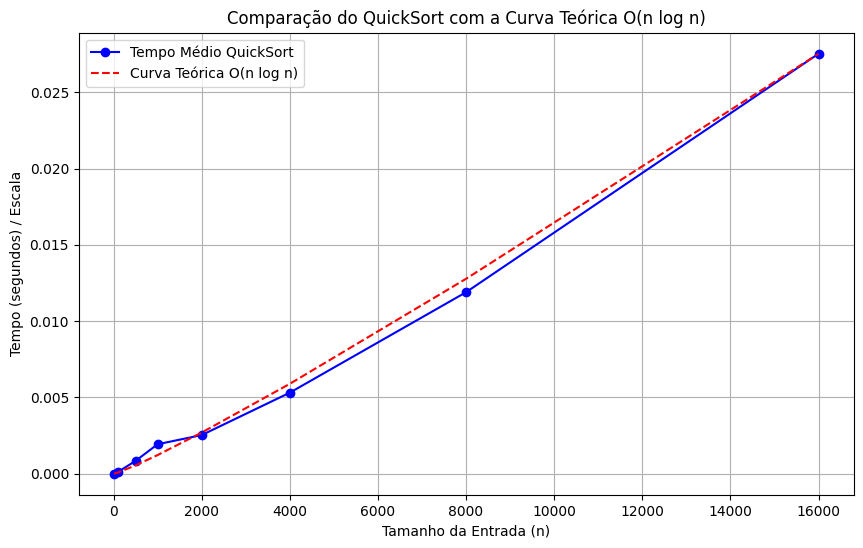

In [4]:
import time
import random
import math
import matplotlib.pyplot as plt

def medir_tempo_quicksort(tamanho, trials=30):
    """Mede o tempo médio de execução do QuickSort para uma lista de tamanho especificado"""
    total_tempo = 0.0
    for _ in range(trials):
        lista = [random.randint(0, 1000) for _ in range(tamanho)]
        inicio = time.perf_counter()
        quicksort(lista)
        total_tempo += time.perf_counter() - inicio
    return total_tempo / trials

# Definição dos tamanhos de entrada
tamanhos = [10, 100, 500, 1000, 2000, 4000, 8000, 16000]
tempos_quicksort = [medir_tempo_quicksort(t) for t in tamanhos]

# Cálculo da curva teórica O(n log n)
n_log_n = [n * math.log2(n) for n in tamanhos]

# Normalização da curva teórica para comparação
fator_escala = tempos_quicksort[-1] / n_log_n[-1]
n_log_n_escalado = [x * fator_escala for x in n_log_n]

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_quicksort, marker='o', linestyle='-', color='b', label='Tempo Médio QuickSort')
plt.plot(tamanhos, n_log_n_escalado, linestyle='--', color='r', label='Curva Teórica O(n log n)')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo (segundos) / Escala')
plt.title('Comparação do QuickSort com a Curva Teórica O(n log n)')
plt.legend()
plt.grid(True)
plt.show()

#### **Pior Caso**

O pior caso ocorre quando o pivô escolhido é sempre o menor ou o maior elemento da sublista. Isso pode acontecer, por exemplo, quando o array está ordenado ou inversamente ordenado. Nesse cenário, a partição é altamente desequilibrada: uma sublista terá $n - 1$ elementos e a outra terá $0$. Isso resulta em $n$ níveis de recursão, conforme apresentado na tabela a seguir:

| Nível da Recursão | Tamanho da Sublista | Trabalho Realizado |
|-------------------|---------------------|---------------------|
| 1º                | $n$                 | $O(n)$              |
| 2º                | $n - 1$             | $O(n - 1)$          |
| 3º                | $n - 2$             | $O(n - 2)$          |
| $\vdots$          | $\vdots$            | $\vdots$            |
| $n$-ésimo         | $1$                 | $O(1)$              |


Essa tabela ilustra a natureza decrescente do tamanho das sublistas e mostra como isso leva à soma:

<center> $T(n)=O(n)+O(n-1)+O(n-2)+⋯+O(1)$ </center>

Essa soma é equivalente a:

<center> $T(n) = \sum_{i=1}^{n} O(i)$ </center>

Que é uma progressão aritmética, cuja soma é:

<center> $O(1 + 2 + \cdots + n) = O\left(\frac{n(n+1)}{2}\right) = O(n^2)
$ </center>

Para verificar esse comportamento, vamos medir o tempo de execução em listas já ordenadas, simulando a escolha ruim do pivô.

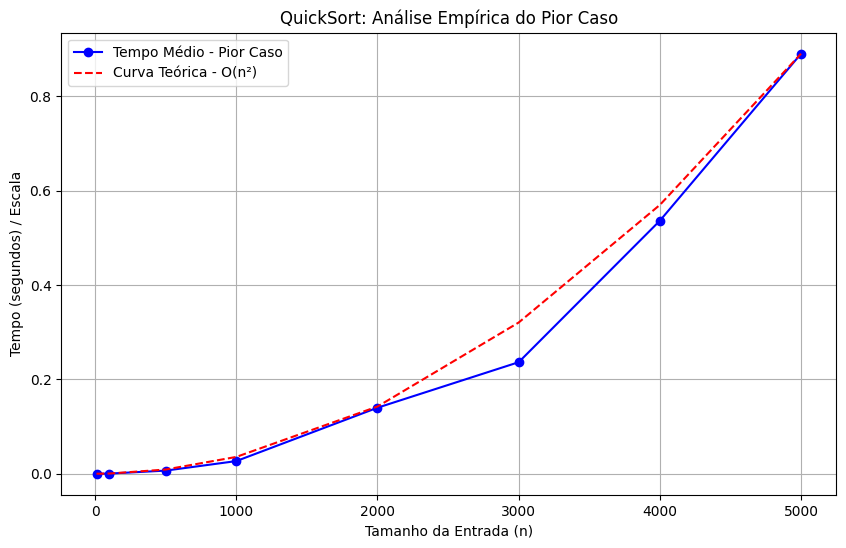

In [5]:
import sys
sys.setrecursionlimit(10000)  # Aumenta o limite para permitir listas maiores

def medir_tempo_pior_caso(tamanho, trials=30):
    """Mede o tempo médio para listas ordenadas (pior caso)"""
    total_tempo = 0.0
    for _ in range(trials):
        lista = list(range(tamanho))  # Lista ordenada
        inicio = time.perf_counter()
        quicksort(lista)
        total_tempo += time.perf_counter() - inicio
    return total_tempo / trials

# Tamanhos das listas a serem testadas
tamanhos = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]
tempos_pior_caso = [medir_tempo_pior_caso(t) for t in tamanhos]

# Curva teórica O(n^2)
n2 = [n**2 for n in tamanhos]

# Normalização para comparação visual
fator_escala = tempos_pior_caso[-1] / n2[-1]
n2_escalado = [x * fator_escala for x in n2]

# Plotagem dos resultados
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos_pior_caso, marker='o', linestyle='-', color='blue', label='Tempo Médio - Pior Caso')
plt.plot(tamanhos, n2_escalado, linestyle='--', color='red', label='Curva Teórica - O(n²)')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo (segundos) / Escala')
plt.title('QuickSort: Análise Empírica do Pior Caso')
plt.legend()
plt.grid(True)
plt.show()

Para contornar esses casos, duas estratégias populares são comumente utilizadas:

##### **Escolha Aleatória do Pivô**


Uma estratégia simples e eficaz para evitar o pior caso do QuickSort, especialmente em listas ordenadas ou quase ordenadas. Ao escolher o pivô de forma aleatória, reduz-se significativamente a chance de criar partições muito desbalanceadas. A complexidade no caso médio continua sendo $O(n \log n)$, mas com menor risco de degradação para $O(n^2)$.

In [6]:
def quicksort_randomizado(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivo = random.choice(arr)
        menores = [x for x in arr if x < pivo]
        iguais = [x for x in arr if x == pivo]
        maiores = [x for x in arr if x > pivo]
        return quicksort_randomizado(menores) + iguais + quicksort_randomizado(maiores)

Vamos medir o tempo médio de execução do QuickSort com pivô aleatório em listas ordenadas crescentemente, onde o algoritmo tradicional teria desempenho ruim.

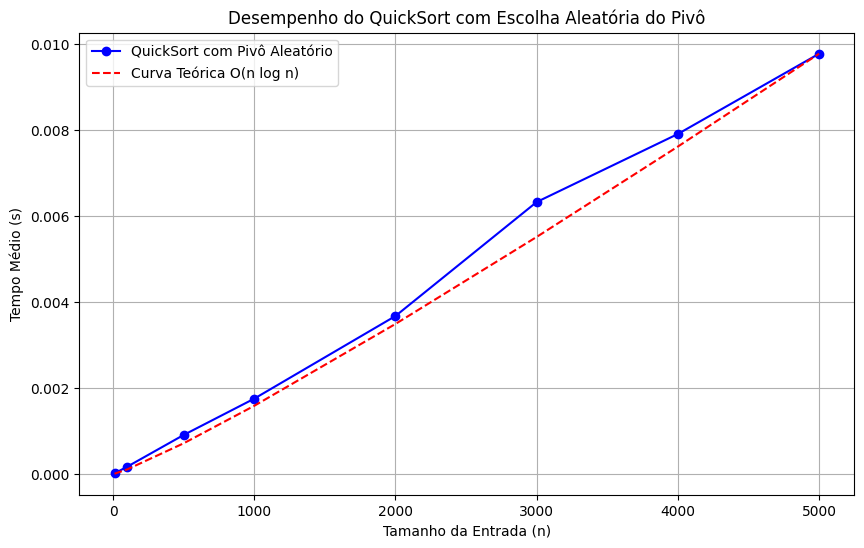

In [7]:
def medir_tempo_random(tamanho, trials=30):
    total_tempo = 0.0
    for _ in range(trials):
        lista = list(range(tamanho))  # lista ordenada (pior caso para pivô fixo)
        inicio = time.perf_counter()
        quicksort_randomizado(lista)
        total_tempo += time.perf_counter() - inicio
    return total_tempo / trials

# Tamanhos de entrada
tamanhos = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]
tempos = [medir_tempo_random(n) for n in tamanhos]

# Curva teórica O(n log n)
n_log_n = [n * math.log2(n) for n in tamanhos]
fator_escala = tempos[-1] / n_log_n[-1]
n_log_n_escalado = [x * fator_escala for x in n_log_n]

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos, marker='o', label='QuickSort com Pivô Aleatório', color='blue')
plt.plot(tamanhos, n_log_n_escalado, linestyle='--', label='Curva Teórica O(n log n)', color='red')
plt.title('Desempenho do QuickSort com Escolha Aleatória do Pivô')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo Médio (s)')
plt.legend()
plt.grid(True)
plt.show()

##### **Mediana de Três**

Escolhe o pivô como a mediana de três elementos: o primeiro, o do meio e o último da lista. Isso ajuda a evitar partições desbalanceadas, que podem ocorrer quando se utiliza apenas o primeiro ou último elemento como pivô, especialmente em listas quase ordenadas.

In [8]:
def mediana_de_tres(arr):
    primeiro = arr[0]
    meio = arr[len(arr) // 2]
    ultimo = arr[-1]
    return sorted([primeiro, meio, ultimo])[1]

def quicksort_mediana_tres(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivo = mediana_de_tres(arr)
        menores = [x for x in arr if x < pivo]
        iguais = [x for x in arr if x == pivo]
        maiores = [x for x in arr if x > pivo]
        return quicksort_mediana_tres(menores) + iguais + quicksort_mediana_tres(maiores)

Vamos usar listas ordenadas como entrada e comparar o tempo médio de execução com a curva teórica $O(n \log n)$.

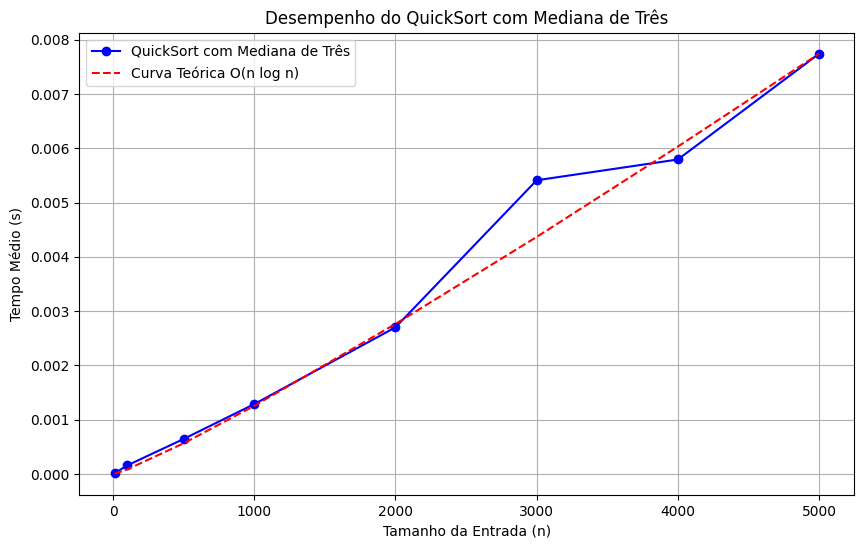

In [9]:
def medir_tempo_mediana(tamanho, trials=30):
    total_tempo = 0.0
    for _ in range(trials):
        lista = list(range(tamanho))  # lista ordenada (simula o pior caso tradicional)
        inicio = time.perf_counter()
        quicksort_mediana_tres(lista)
        total_tempo += time.perf_counter() - inicio
    return total_tempo / trials

# Tamanhos de entrada
tamanhos = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]
tempos = [medir_tempo_mediana(n) for n in tamanhos]

# Curva teórica O(n log n)
n_log_n = [n * math.log2(n) for n in tamanhos]
fator_escala = tempos[-1] / n_log_n[-1]
n_log_n_escalado = [x * fator_escala for x in n_log_n]

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(tamanhos, tempos, marker='o', label='QuickSort com Mediana de Três', color='blue')
plt.plot(tamanhos, n_log_n_escalado, linestyle='--', label='Curva Teórica O(n log n)', color='red')
plt.title('Desempenho do QuickSort com Mediana de Três')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo Médio (s)')
plt.legend()
plt.grid(True)
plt.show()

## **Exercícios**

### **Exercícios sobre a função particionar**


1. **Rastreamento Manual:** Dado o array `arr = [7, 2, 1, 6, 8, 5, 3, 4]` e usando o último elemento (4) como pivô, execute manualmente a função particionar(arr, 0, 7). Mostre o estado do array arr e os valores dos índices a cada troca realizada. Qual é o índice final do pivô?

2. **Rastreamento (Pivô não ideal):** Execute manualmente a função `particionar(arr, inicio, fim)` para `arr = [1, 2, 3, 4, 5, 6]` usando o último elemento (6) como pivô. Como o array é particionado neste caso (que se aproxima do pior caso)?

3. **Modificação (Ordem Decrescente):** Como você modificaria a lógica de comparação dentro da função particionar para que ela organize os elementos de forma que os maiores fiquem antes do pivô e os menores depois, preparando o terreno para uma ordenação decrescente?

### **Exercícios sobre Estratégias de Pivô e Variações**


1. **Melhor vs. Pior Caso:** Explique por que o Quicksort tem uma complexidade de pior caso de $O(n^2)$, enquanto seu caso médio e melhor caso são $O(n \log n)$. Dê um exemplo de entrada e estratégia de pivô que leve ao melhor e pior caso.

2. **Quicksort na Prática:** Apesar de ter um pior caso de $O(n^2)$, por que o Quicksort é frequentemente mais rápido na prática do que o Merge Sort para muitas entradas típicas? (Dica: pense em fatores constantes e uso de memória).

### **Exercícios de Aplicação e Modificação**

1. **Estabilidade:** O Quicksort (nas implementações padrão) é um algoritmo de ordenação estável? Explique o que é estabilidade e dê um exemplo para ilustrar se o Quicksort preserva ou não a ordem relativa de elementos com chaves iguais.
